# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada data sensor accelerometer dan gyro mobile phone menggunakan K-Nearest Neighbor

<b>Kelompok: 7 </b>

Anggota:
1. Rafianto Tri Aushaf - 1301223274
2. Agil Ditya Rafiazmi - 1301223044
3. Muhammad Farhan Editya - 1301223077

#### Pendahuluan
Dataset ini dikumpulkan pada tahun 2022 di Universitas King Saud di Riyadh untuk mengenali aktivitas manusia menggunakan sensor IMU (Inertial Measurement Unit) pada ponsel, yaitu akselerometer dan giroskop. Dataset ini digunakan untuk menganalisis dan mengklasifikasikan aktivitas pengguna ponsel menjadi dua kategori: berdiri diam (standing/stop) dan berjalan (walking).

<br>

Pada dataset kami, terdapat data fitur dan juga data target. Data fitur berisi informasi terkait tentang accelerometer dan gyroscope pada sumbu X,Y, dan Z yang menjadi fitur. Sedangkan data target yaitu "Activity" berisi informasi terkait Kode numerik yang merepresentasikan aktivitas yang dilakukan saat data diambil, di mana "0" menunjukkan aktivitas berdiri diam (standing/stop) dan "1" menunjukkan aktivitas berjalan (walking).

<br>
Untuk preprocessing data dilakukan pengecekan apakah data memiliki null value atau tidak.Selain itu juga dilakukan ppemotongan jumlah data Activity yang bernilai satu dari 31420 menjadi 571 untuk menyeimbangkan jumlah data target.

<br>
Dilakukan eksperimen terhdap data testing dan train, pertama tidak dilakukan handling outlier pada dataset yang kedua dilakukan handle outlier menggunakan metode IQR. Hal ini dilakukan untuk mencari tahu apakah terdapat perbedaan pada akurasi terhadap data target jika dilakukan handle outlier.



In [230]:
#Import beberapa library yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/accelerometer_gyro_mobile_phone_dataset.csv")
df.head()


,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


**DATA PREPROCESSING**

Check for NaN/null data

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [232]:
df.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [233]:
#Drop unuserd columm
df.drop(columns=['timestamp'],inplace=True, axis=1)
df

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,1
...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,1


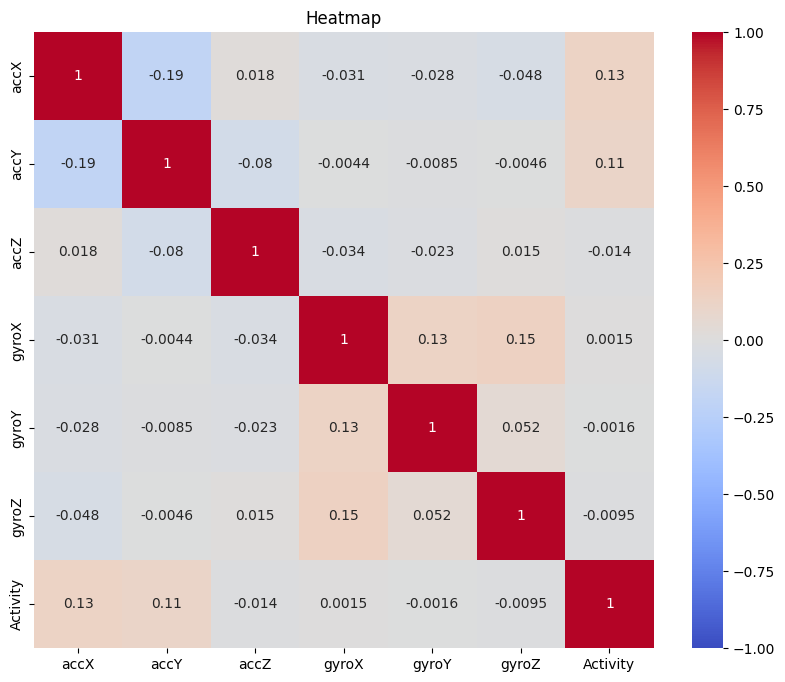

In [266]:

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()


In [267]:
arr = []
for i in df["Activity"]:
  arr.append(i)

print(set(arr))


counts = df["Activity"].value_counts()
count_0 = counts.get(0, 0)

count_1 = counts.get(1,0)
print(counts)
print(f"Jumlah angka 0: {count_0}")
print(f"Jumlah angka 1: {count_1}")
print(count_1%count_0, count_0 % count_1)


{0, 1}
Activity
1    31420
0      571
Name: count, dtype: int64
Jumlah angka 0: 571
Jumlah angka 1: 31420
15 571


In [234]:
df_0 = df.loc[df['Activity'] == 0].copy()
df_1 = df.loc[df['Activity'] == 1].copy()
df_1,df_0

(           accX      accY       accZ     gyroX     gyroY     gyroZ  Activity
 0     -0.496517  3.785628   8.954828 -0.142849 -0.126159 -0.022539         1
 1     -0.462388  3.869603   9.281898  0.084349  0.096695  0.092130         1
 2     -0.296084  3.820505   8.930728  0.061763  0.051543  0.071287         1
 3     -0.469723  3.890110   8.744067  0.007641  0.028679  0.109433         1
 4     -0.472418  4.109105   8.941207 -0.123640  0.099057  0.051943         1
 ...         ...       ...        ...       ...       ...       ...       ...
 31986 -0.488734  1.610800  10.610386  0.079187 -0.174218 -0.050365         1
 31987 -0.049397  2.769092   7.008276 -0.083853  0.007656 -0.045658         1
 31988  0.291294  3.002007   6.732400  0.005984 -0.058994 -0.087044         1
 31989  0.256267  4.069138   8.687933  0.061487 -0.016278 -0.088728         1
 31990  0.646356  5.273683  10.216704 -0.142294 -0.000884  0.048970         1
 
 [31420 rows x 7 columns],
            accX      accY       ac

In [235]:
df_1_train = df_1.iloc[:571].copy()
df_1_train

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,1
...,...,...,...,...,...,...,...
566,1.063538,0.460592,10.961106,-0.322778,-0.088029,0.171807,1
567,0.745749,0.484542,9.260642,-0.407712,-0.062257,-0.275962,1
568,0.345482,1.665736,6.187084,0.016177,0.283513,-0.396225,1
569,0.606389,1.775159,8.577313,0.163194,-0.337880,-0.337442,1


In [236]:
df_1_test = df_1.iloc[571:].copy()
df_1_test

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
571,-1.038690,2.609973,11.683354,0.376741,0.156276,0.043139,1
572,-0.145797,1.185235,8.990005,-0.162520,0.170168,0.260748,1
573,0.161215,-0.067959,9.694440,-0.655506,0.350784,0.391714,1
574,0.248483,1.833986,6.925498,-0.009572,0.542891,0.091328,1
575,-0.068108,1.608405,8.634494,0.152516,-0.330571,0.163916,1
...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,1


In [237]:
train_df = pd.concat([df_0, df_1_train])

In [238]:
#Pisahkan kolom fitur dan target untuk train data

x_train_features = train_df[['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']].copy()
y_train = train_df['Activity'].copy()

In [239]:
x_train_features.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,-0.437748,1.784142,9.648687,-0.007887,-0.018681,0.001032
std,0.610533,1.124043,1.661451,0.276000,0.250366,0.265887
min,-3.673361,-1.477577,4.849016,-1.229589,-1.141854,-1.408300
25%,-0.702714,1.065709,8.742607,-0.113387,-0.142107,-0.133197
50%,-0.485590,1.654360,9.673634,0.001623,-0.004599,0.016293
75%,-0.103510,2.311418,10.188451,0.135222,0.089823,0.149198
max,1.755250,6.377039,15.480209,1.080128,0.944855,1.124462


In [240]:
#Pisahkan kolom fitur dan target untuk test data
x_test_features = df_1_test[['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']].copy()
y_test = df_1_test['Activity'].copy()

In [241]:
x_test_features.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ
count,30849.000000,30849.000000,30849.000000,30849.000000,30849.000000,30849.000000
mean,0.040912,2.167544,9.533808,-0.004368,-0.014610,-0.007319
std,0.740304,1.081607,2.069439,0.308756,0.249161,0.266128
min,-3.571423,-4.386029,4.296066,-1.470421,-1.430659,-1.894102
25%,-0.452958,1.429677,7.770192,-0.151315,-0.163163,-0.155022
50%,-0.006586,2.140848,9.376352,0.024175,-0.011573,0.004403
75%,0.493973,2.942880,11.182047,0.179273,0.125895,0.152126
max,4.678671,6.326893,17.591568,1.332722,1.480135,1.482268


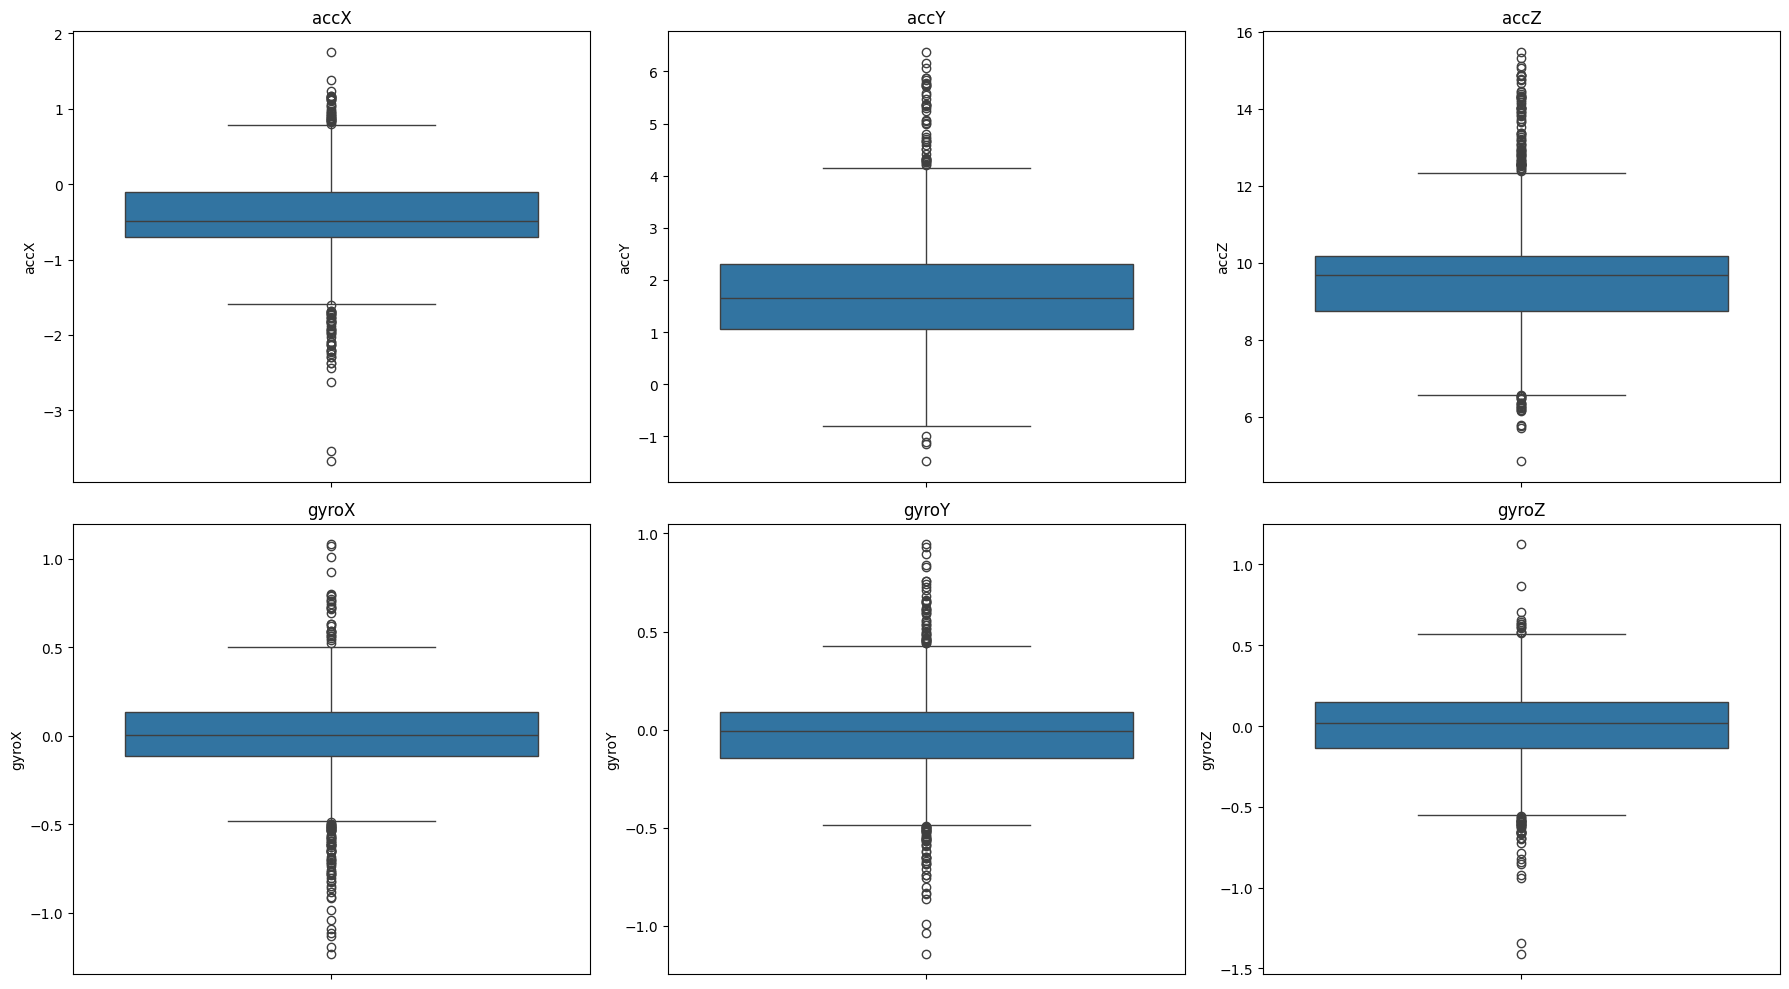

In [242]:
# Boxplot untuk melihat outlier dari data train
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


sns.boxplot(y=x_train_features['accX'], ax=axes[0, 0]).set_title('accX')
sns.boxplot(y=x_train_features['accY'], ax=axes[0, 1]).set_title('accY')
sns.boxplot(y=x_train_features['accZ'], ax=axes[0, 2]).set_title('accZ')


sns.boxplot(y=x_train_features['gyroX'], ax=axes[1, 0]).set_title('gyroX')
sns.boxplot(y=x_train_features['gyroY'], ax=axes[1, 1]).set_title('gyroY')
sns.boxplot(y=x_train_features['gyroZ'], ax=axes[1, 2]).set_title('gyroZ')

plt.tight_layout()
plt.show()

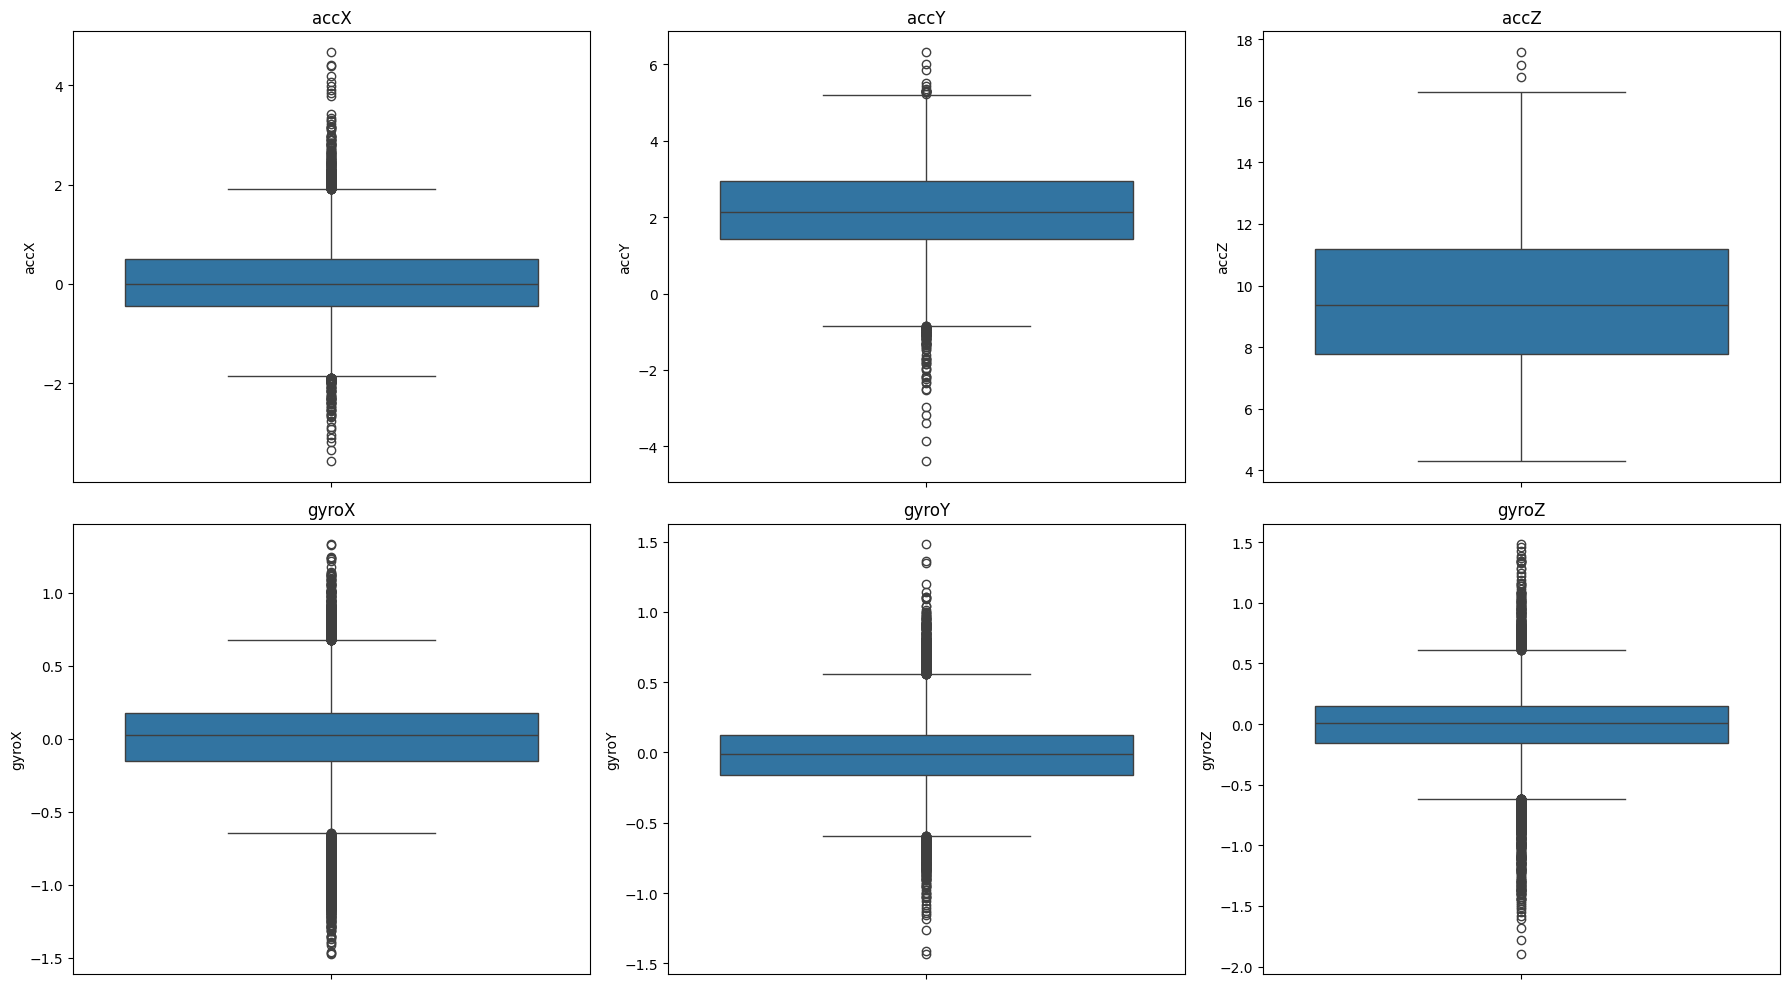

In [243]:
# Boxplot untuk melihat outlier dari data test
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


sns.boxplot(y=x_test_features['accX'], ax=axes[0, 0]).set_title('accX')
sns.boxplot(y=x_test_features['accY'], ax=axes[0, 1]).set_title('accY')
sns.boxplot(y=x_test_features['accZ'], ax=axes[0, 2]).set_title('accZ')


sns.boxplot(y=x_test_features['gyroX'], ax=axes[1, 0]).set_title('gyroX')
sns.boxplot(y=x_test_features['gyroY'], ax=axes[1, 1]).set_title('gyroY')
sns.boxplot(y=x_test_features['gyroZ'], ax=axes[1, 2]).set_title('gyroZ')

plt.tight_layout()
plt.show()

**Normalisasi data**

In [244]:
sc = StandardScaler()
x_normal = sc.fit_transform(x_train_features)


#### Metode yang Digunakan
Metode yang digunakan untuk mengolah dataset ini adalah K-NN, dengan parameter nilai K.

In [245]:
# Splitting data into train (80%) and test (20%)

X=x_normal
y_arr = y_train.to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,y_arr,test_size=0.2,random_state=42)


In [269]:
print("jumlah data train fitur:",x_train.shape)
print("jumlah data test fitur:" ,x_test.shape)
print("jumlah data train target",y_train.shape)
print("jumlah data test target",y_test.shape)

jumlah data train fitur: (913, 6)
jumlah data test fitur: (229, 6)
jumlah data train target (913,)
jumlah data test target (229,)


**Train model**

In [246]:
#euclidean distance
import numpy as np
def euclidean(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [247]:
def nearest_neighbors(x_train, y_train, test, k):
    jarak = []
    for i in range(len(x_train)):
        jarak = euclidean(x_train[i], test)
        jarak.append((y_train[i], jarak))
    jarak.sort(key=lambda x: x[1])
    neighbors = jarak[:k]
    return [neighbor[0] for neighbor in neighbors]

In [248]:
from collections import Counter
def predict(x_train, y_train, test_instance, k):
    neighbors = nearest_neighbors(x_train, y_train, test_instance, k)
    most_common_label = Counter(neighbors).most_common(1)[0][0]
    return most_common_label


In [249]:
def get_accuracy(y_test, predictions):
    true = 0
    for x in range(len(y_test)):
        if y_test[x] == predictions[x]:
            true += 1
    return (true / float(len(y_test))) * 100.0

In [250]:
def KNN(x_train, y_train, x_test, y_test, k):
    prediksi_data = []
    for i in x_test:
        prediksi_datas = predict(x_train, y_train, i, k)
        prediksi_data.append(prediksi_datas)

    accuracy = get_accuracy(y_test, predictions)
    return accuracy,predictions


In [251]:
from sklearn.model_selection import KFold
def cross_validation(X_features, Y_target, k, num_folds=5):
    kf = KFold(n_splits=num_folds)
    accuracies = []
    for train_index, valid_index in kf.split(X_features):
        Xtrain, Xvalid = X_features[train_index], X_features[valid_index]
        Ytrain, Yvalid = Y_target[train_index], Y_target[valid_index]
        accuracy, _ = KNN(Xtrain, Ytrain, Xvalid, Yvalid, k)
        accuracies.append(accuracy)
    return np.mean(accuracies)

In [252]:
def find_bestK(k_values, x_train, y_train):
    best_k = 0
    score = 0.0
    for k in k_values:
        avg_accuracy = cross_validation(x_train, y_train, k)
        print(f'k={k}, Akurasi rata-rata ={avg_accuracy}')
        if avg_accuracy > score:
            score = avg_accuracy
            best_k = k
    print(f"Nilai k terbaik: {best_k}")
    return best_k

k=2, Rata-rata Akurasi=86.85161832702816
k=3, Rata-rata Akurasi=89.04401609319643
k=5, Rata-rata Akurasi=88.49876899057227
k=7, Rata-rata Akurasi=88.17029964570949
Nilai k terbaik: 3
Akurasi k terbaik (3): 89.08296943231441%


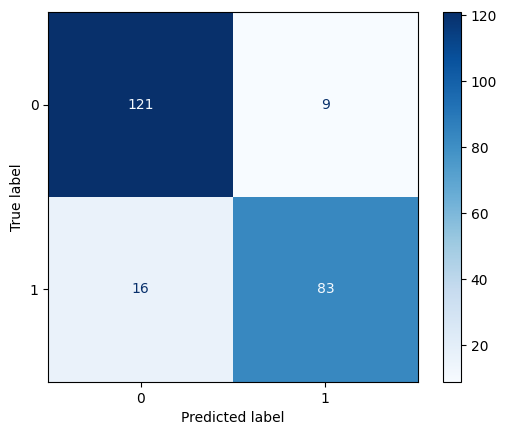

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
k_values = [2, 3, 5, 7]
best_k = find_bestK(k_values, x_train, y_train)

#Model testing
accuracy, predictions = KNN(x_train, y_train, x_test, y_test, best_k)
print(f'Akurasi k terbaik ({best_k}): {accuracy}%')
plot_confusion_matrix(y_test, predictions)

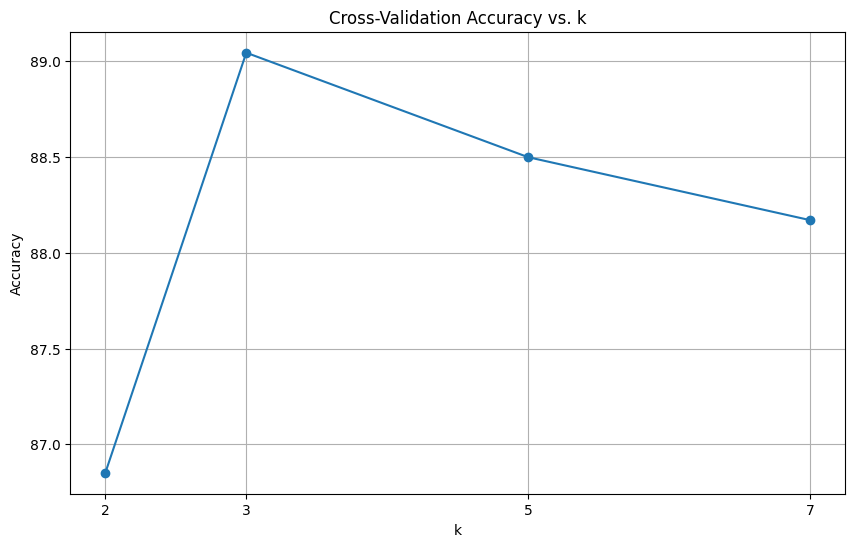

In [254]:
accuracies = [cross_validation(x_train, y_train, k) for k in k_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Cross-Validation Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Perbandingan jika outlier dibersihkan**

In [255]:
df_cls = pd.read_csv("/content/accelerometer_gyro_mobile_phone_dataset.csv")
df_cls.head()


,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [256]:
df_cls.drop(columns=['timestamp'],inplace=True, axis=1)
df_cls
df_0_cls = df.loc[df_cls['Activity'] == 0].copy()
df_1_cls = df_cls.loc[df['Activity'] == 1].copy()
df_1_cls = df_1_cls.iloc[:571].copy()

In [257]:
train_df_cls = pd.concat([df_0_cls, df_1_cls])
x_train_features_cls = train_df_cls[['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']].copy()
y_train_cls = train_df_cls['Activity'].copy()

In [258]:
x_train_features_cls.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,-0.437748,1.784142,9.648687,-0.007887,-0.018681,0.001032
std,0.610533,1.124043,1.661451,0.276000,0.250366,0.265887
min,-3.673361,-1.477577,4.849016,-1.229589,-1.141854,-1.408300
25%,-0.702714,1.065709,8.742607,-0.113387,-0.142107,-0.133197
50%,-0.485590,1.654360,9.673634,0.001623,-0.004599,0.016293
75%,-0.103510,2.311418,10.188451,0.135222,0.089823,0.149198
max,1.755250,6.377039,15.480209,1.080128,0.944855,1.124462


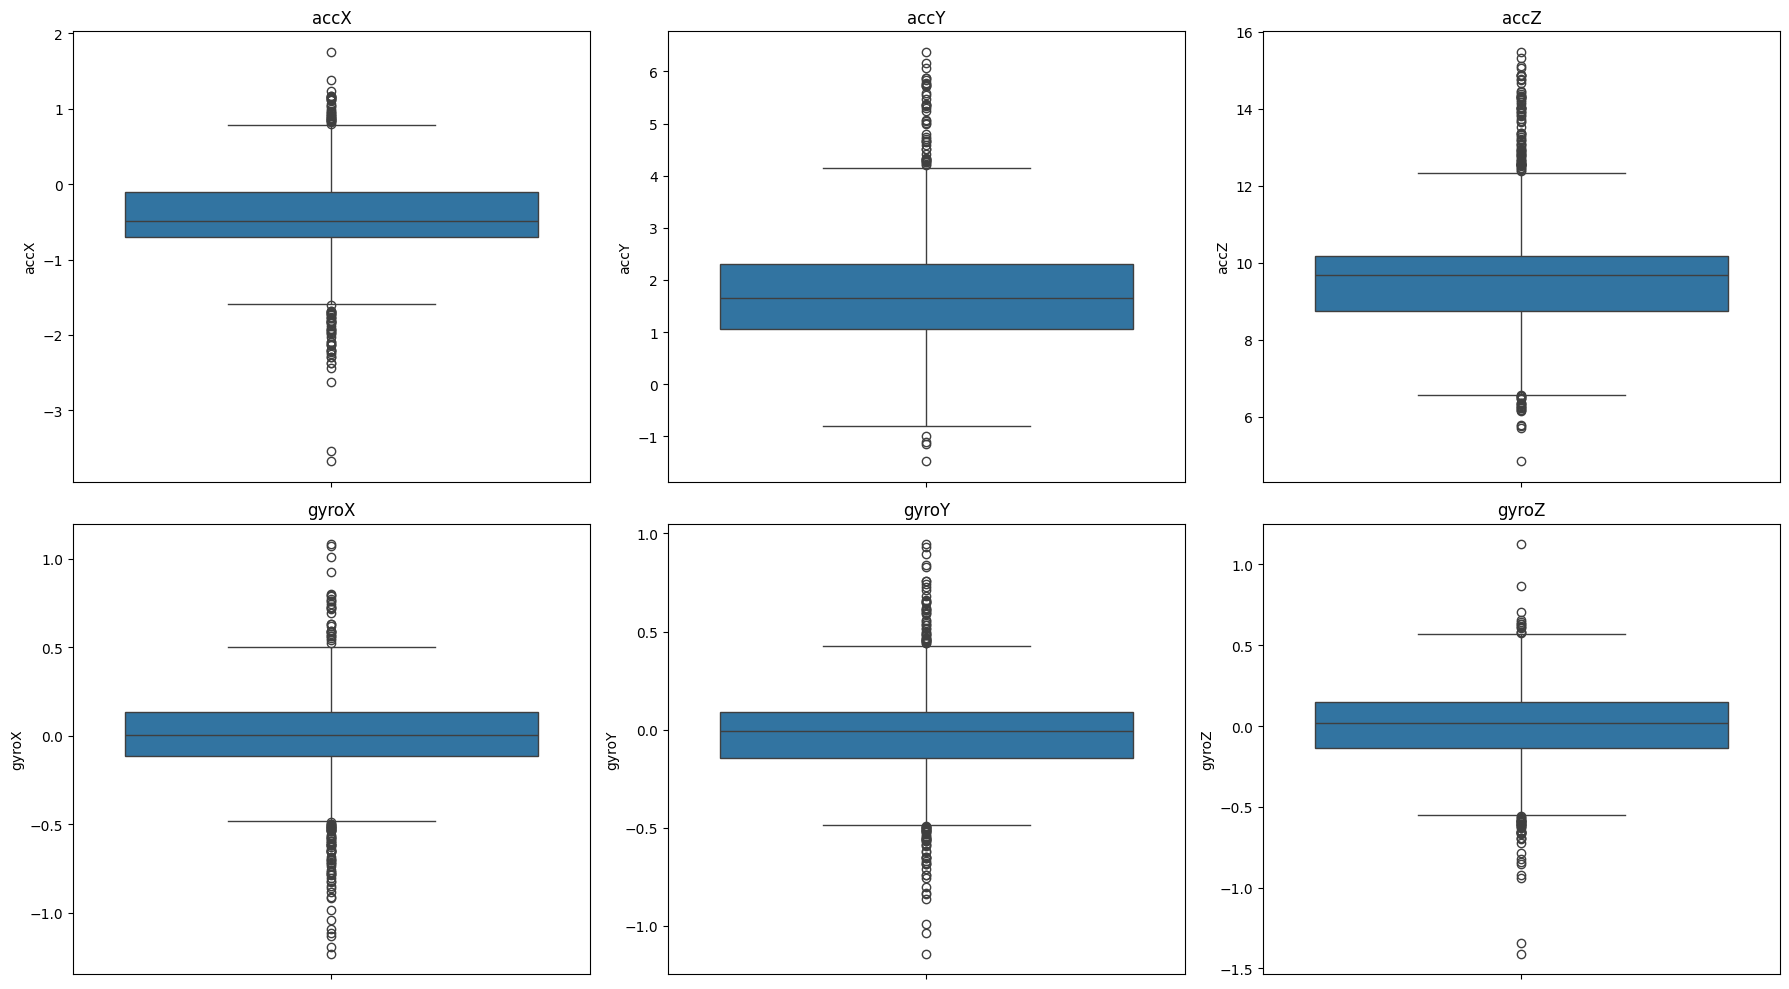

In [259]:
# Boxplot untuk melihat outlier dari data train
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(y=x_train_features_cls['accX'], ax=axes[0, 0]).set_title('accX')
sns.boxplot(y=x_train_features_cls['accY'], ax=axes[0, 1]).set_title('accY')
sns.boxplot(y=x_train_features_cls['accZ'], ax=axes[0, 2]).set_title('accZ')


sns.boxplot(y=x_train_features_cls['gyroX'], ax=axes[1, 0]).set_title('gyroX')
sns.boxplot(y=x_train_features_cls['gyroY'], ax=axes[1, 1]).set_title('gyroY')
sns.boxplot(y=x_train_features_cls['gyroZ'], ax=axes[1, 2]).set_title('gyroZ')

plt.tight_layout()
plt.show()

In [260]:
# Handle outliers menggunakan metode IQR
for col in x_train_features_cls.columns:
    Q1 = x_train_features_cls[col].quantile(0.25)
    Q3 = x_train_features_cls[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    x_train_features_cls.loc[x_train_features_cls[col] < lower_bound, col] = lower_bound
    x_train_features_cls.loc[x_train_features_cls[col] > upper_bound, col] = upper_bound


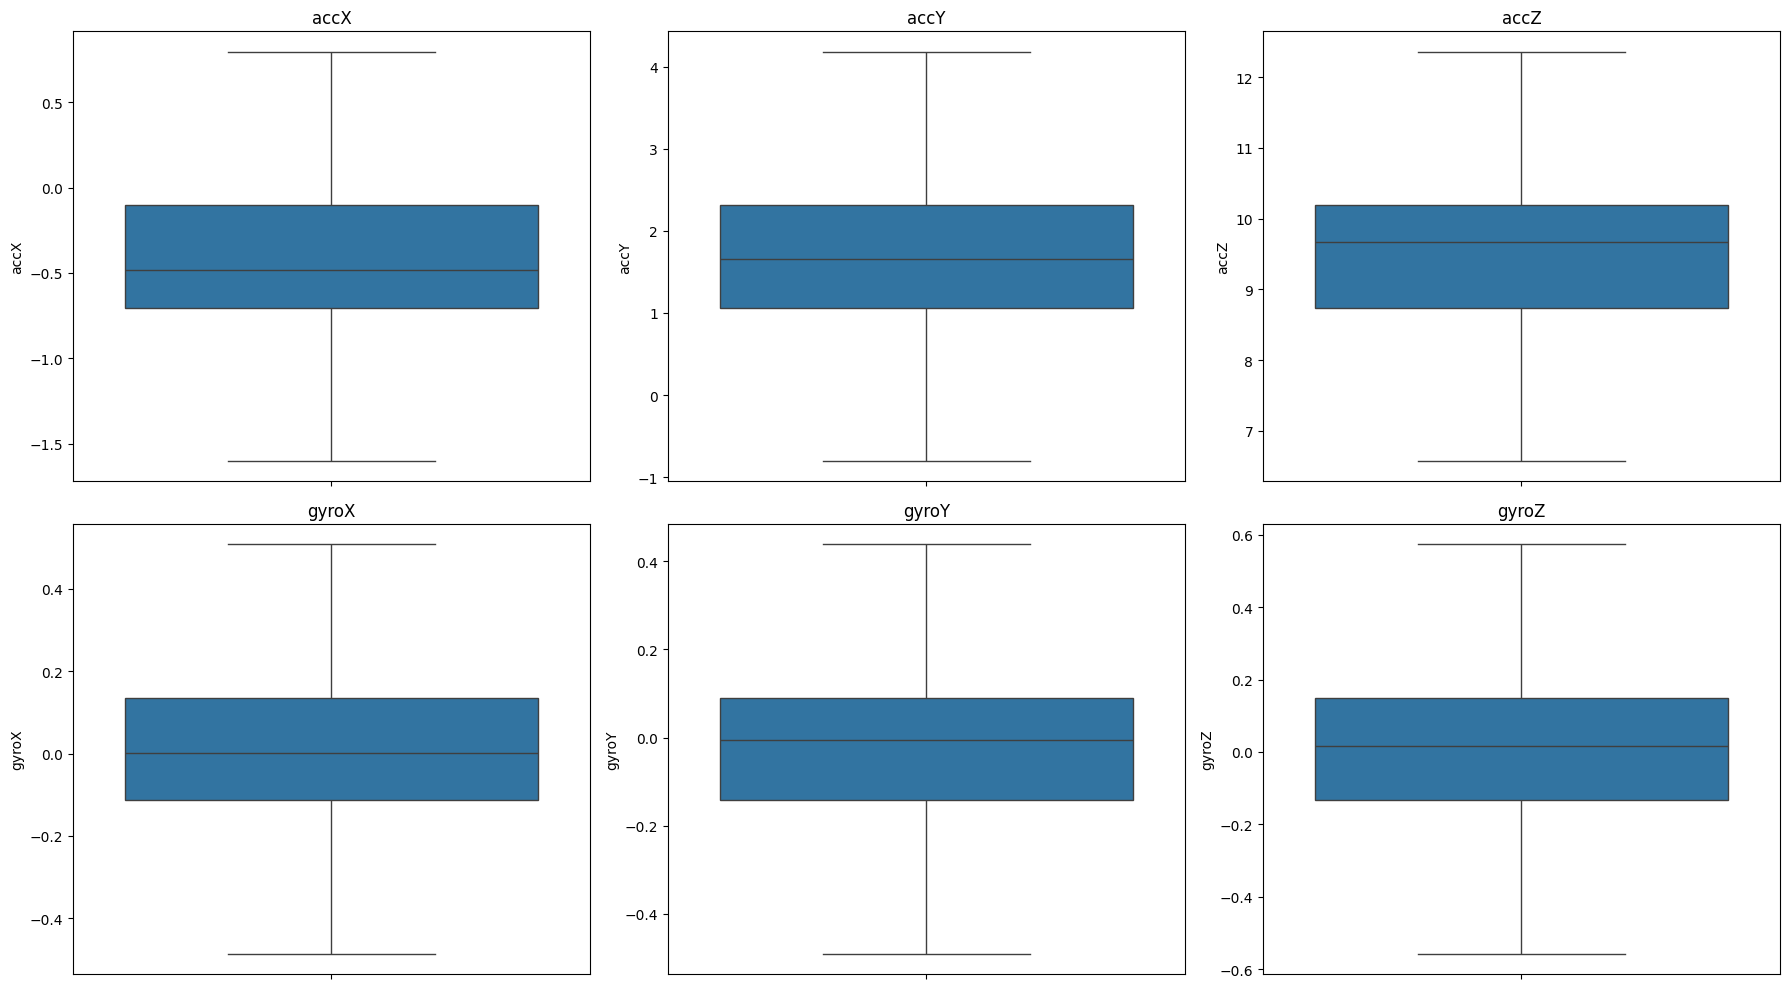

In [261]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(y=x_train_features_cls['accX'], ax=axes[0, 0]).set_title('accX')
sns.boxplot(y=x_train_features_cls['accY'], ax=axes[0, 1]).set_title('accY')
sns.boxplot(y=x_train_features_cls['accZ'], ax=axes[0, 2]).set_title('accZ')

sns.boxplot(y=x_train_features_cls['gyroX'], ax=axes[1, 0]).set_title('gyroX')
sns.boxplot(y=x_train_features_cls['gyroY'], ax=axes[1, 1]).set_title('gyroY')
sns.boxplot(y=x_train_features_cls['gyroZ'], ax=axes[1, 2]).set_title('gyroZ')

plt.tight_layout()
plt.show()


**Normalisasi**

In [262]:
sc = StandardScaler()
x_normal_cls = sc.fit_transform(x_train_features_cls)

In [263]:
X_cls=x_normal_cls
y_arr_cls = y_train_cls.to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X_cls,y_arr_cls,test_size=0.2,random_state=42)

k=2, Rata-rata Akurasi=86.7411277247343
k=3, Rata-rata Akurasi=88.49936948297605
k=5, Rata-rata Akurasi=88.39128085029725
k=7, Rata-rata Akurasi=87.95292139554434
Nilai k terbaik: 3
Akurasi k terbaik (3): 88.20960698689956%


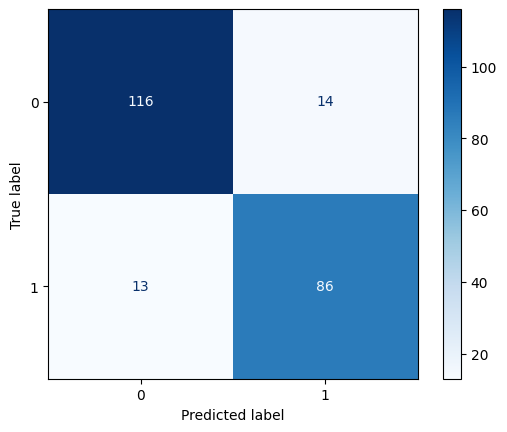

In [264]:
k_values = [2, 3, 5, 7]
best_k = find_bestK(k_values, x_train, y_train)
accuracy, predictions = KNN(x_train, y_train, x_test, y_test, best_k)
print(f'Akurasi k terbaik ({best_k}): {accuracy}%')
plot_confusion_matrix(y_test, predictions)

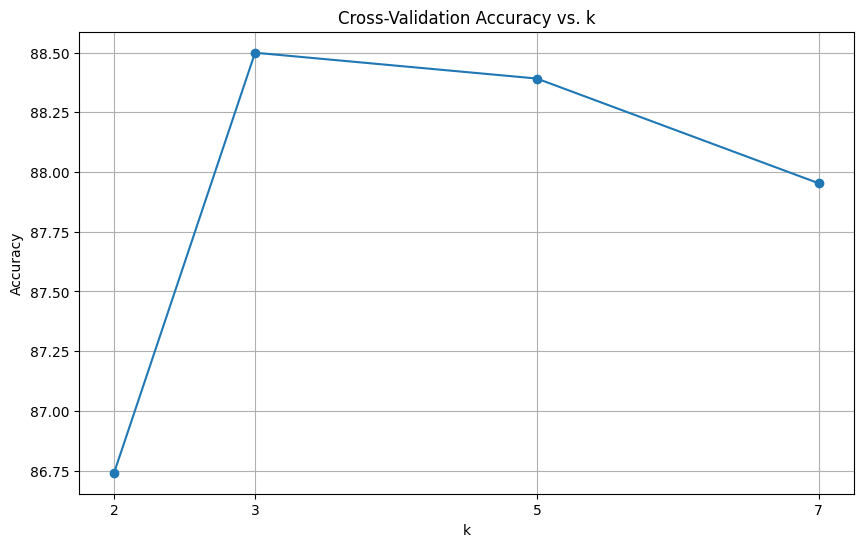

In [265]:
accuracies = [cross_validation(x_train, y_train, k) for k in k_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Cross-Validation Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Hasil dan Analisis
Berdasarkan hasil analisis dari eksperimen, pada data yang tidak dilakukan pembersihan outlier pada training menggunakan cross-validation k terbaik = 3 dengan akurasi 89%. Begitu juga pada data testing mendapatkan akurasi sekitar 89%.

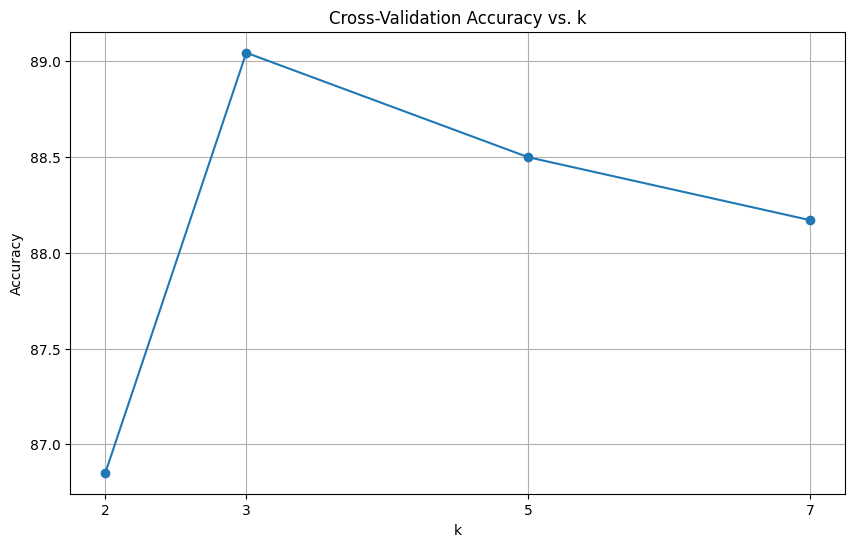

Pada data yang dilakukan pembersihan outlier pada training menggunakan cross-validation k terbaik = 3 dengan akurasi 88.5%. Begitu juga pada data testing mendapatkan akurasi sekitar 88.2%.



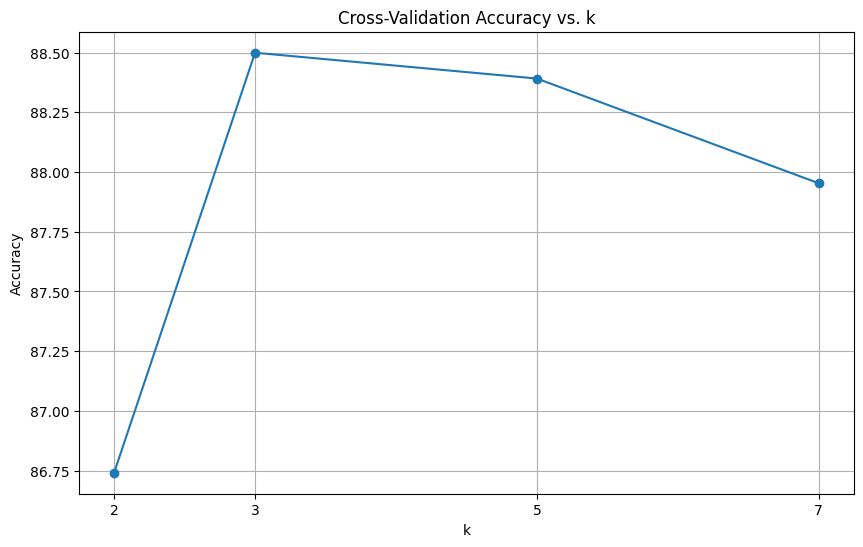

#### Kesimpulan


**Kesimpulan**:
- Meskipun terdapat sedikit perbedaan dalam akurasi antara data yang dilakukan pembersihan outlier dan yang tidak, perbedaan tersebut tidak signifikan.
- Pembersihan outlier tampaknya tidak memberikan peningkatan yang substansial dalam performa model klasifikasi pada dataset ini.
- Pemilihan nilai k terbaik adalah 3, yang mungkin merupakan nilai k yang optimal untuk model ini berdasarkan hasil cross-validation.
- Model klasifikasi k-NN memiliki kinerja yang stabil dan cukup baik dalam memprediksi kategori target pada dataset ini, baik dengan atau tanpa pembersihan outlier.